In [1]:
import numpy as np
import pandas as pd
import json, os, glob
from os.path import join
import matplotlib.pyplot as plt
from collections import Counter
from usefull_function import make_numpy_array, get_all_labels, get_class, get_id_label_dict

%matplotlib inline

In [2]:
db_type = 'hands'
#json_dir= '../../data/json_3/'
json_dir= '../json/'  # AT 24 april 2020

#train_dir = '../../data/train/'
train_dir = '../videos/'

train_labels = '../labels/train.csv'
val_labels = '../labels/validation.csv'
all_labels = '../labels/labels.csv'

files = os.listdir(json_dir)

labels = get_id_label_dict(train_labels, val_labels)
label_class_dict = get_all_labels(all_labels)

---

Iterate through the json files, check if the video adheres to be below defined criterion if so transform is to a numpy array.

1. It shouldn't have a label
2. Check is the maximum number of frames is in the interval $[30,28]$
3. If more then $20\%$ of the frames is corrupt, skip the video

---

In [3]:
all_labels_red = []
hand_percentage = []
test_data = 0
for i, file in enumerate(files):
  # If there is a file that is not a json (.DS_store wtf)
  if 'json' not in file:
    continue
    
  # Load the json file
  with open(join(json_dir,file),'rb') as f:
    json_all = json.load(f)
    
  if json_all['label'] == '?':
    test_data += 1
    continue
    
  json_data = json_all['data']
  # Check the number of frames
  json_frames = sorted(json_data.keys())
  num_frames = len(json_frames)
  
  if int(json_frames[-1]) > 38 | int(json_frames[-1]) < 30:
    continue

  no_person = 0
  for k in json_frames:
    try:
      person = json_data[k][0]
    except:
      no_person += 1
      continue
      
  if no_person/num_frames > .2:
    continue
    
  result = make_numpy_array(json_all, db_type)
  
  output_dir = join(train_dir,db_type,file[:-5])
  
  ## Uncomment the line below if you actually want to save the data.
  #np.save(output_dir, result) 
  
  
  # Check the label
  all_labels_red.append(json_all['label'])

Make a bar chart so that we can see the eventual labels distribution

3


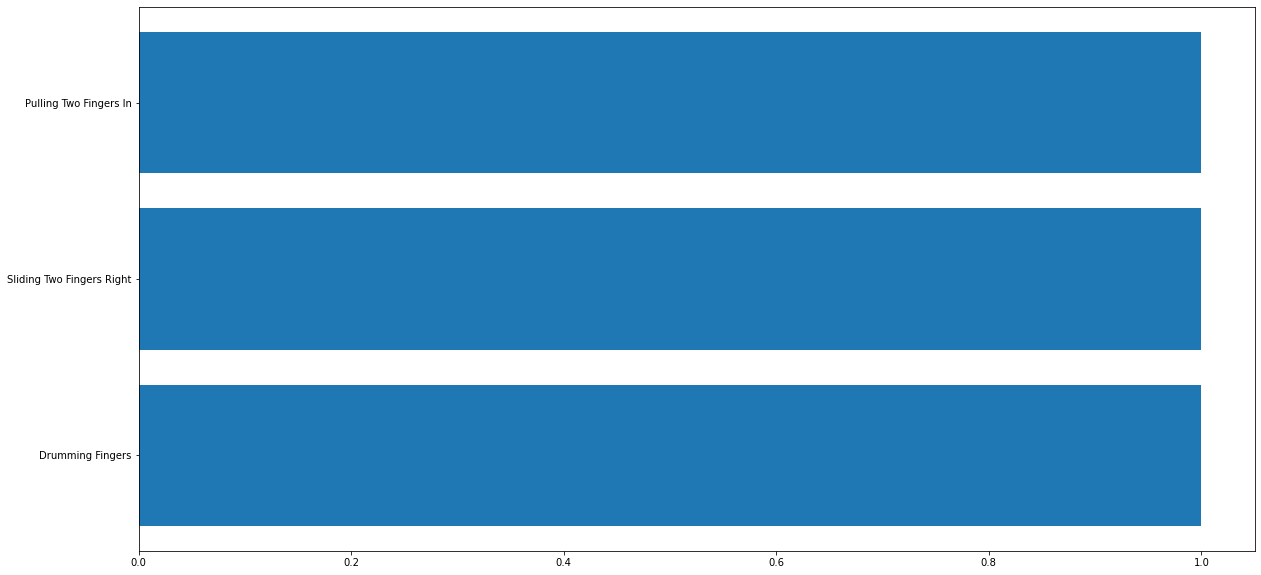

In [4]:
print(len(all_labels_red))
count = Counter(all_labels_red)
x, y = count.keys(), count.values()
plt.figure(figsize= (20,10))
plt.barh(list(range(len(x))), y)
_ = plt.yticks(list(range(len(x))),x)
plt.savefig('distribution_of_labels')